In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import r2_score
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer, r2_score
from sklearn.base import BaseEstimator, TransformerMixin

In [2]:
Brain_final_df = pd.read_csv("Brain variables and proteomics data.csv")

C:\Users\Romina\AppData\Local\Temp\ipykernel_17668\1591644362.py:1: DtypeWarning: Columns (20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,

In [3]:
proteomics_file = r"C:\Users\Romina\OneDrive\Desktop\Project\Clean Notebooks and files\proteomics_preprocessed.csv"
proteomics_df = pd.read_csv(proteomics_file)

C:\Users\Romina\AppData\Local\Temp\ipykernel_17668\889670466.py:2: DtypeWarning: Columns (25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,

In [4]:
phenotype = r"c:\Users\Romina\Downloads\ukb674360 (1).txt"

In [5]:
columns_to_include = [
    "eid", "31-0.0", "34-0.0", 
    "55-3.0", "93-0.0", "93-0.1", "93-1.0", "93-1.1", "93-2.0", "93-2.1", "93-3.0", "93-3.1",  
    "94-0.0", "94-0.1", "94-1.0", "94-1.1", "94-2.0", "94-2.1", "94-3.0", "94-3.1", 
    "95-0.0", "95-0.1", "95-1.0", "95-1.1", "95-2.0", "95-2.1", "95-3.0", "95-3.1", 
    "96-3.1", "102-0.0", "102-0.1", "102-1.0", "102-1.1", "102-2.0", "102-2.1", "102-3.0", "102-3.1", 
    "4056-3.0", "4079-0.0", "4079-0.1", "4079-1.0", "4079-1.1", "4079-2.0", "4079-2.1", "4079-3.0", "4079-3.1",
    "4080-0.0", "4080-0.1", "4080-1.0", "4080-1.1", "4080-2.0", "4080-3.0", "4080-3.1",
    "21000-3.0", "21001-0.0", "21001-1.0", "21001-2.0", "21001-3.0",
    "21002-0.0", "21002-1.0", "21002-3.0",
    "30620-1.0", "30630-1.0",
    "30640-0.0", "30640-1.0",
    "30680-1.0", "30690-0.0", "30690-1.0",
    "30700-1.0", "30710-0.0", "30710-1.0",
    "30730-1.0", "30740-0.0", "30740-1.0",
    "30750-0.0", "30750-1.0",
    "30760-0.0", "30760-1.0",
    "30770-1.0", "30780-0.0", "30780-1.0",
    "30790-0.0", "30790-1.0",
    "30860-1.0", "30870-0.0", "30870-1.0"
]


In [6]:
Heart_pheno = pd.read_csv( phenotype, usecols=columns_to_include, sep="\t", on_bad_lines='skip')

In [7]:
Heart_pheno

eid  31-0.0  34-0.0  55-3.0  93-0.0  93-0.1  93-1.0  93-1.1  \
NaN 1000018  1.0    1954  1045.0     NaN     NaN     NaN     NaN     NaN   
    1000024  1.0    1940  1051.0     NaN     NaN     NaN     NaN     NaN   
    1000031  1.0    1948  1058.0     NaN     NaN     NaN     NaN     NaN   
    1000043  1.0    1945  2817.0     NaN     NaN     NaN     NaN     NaN   
    1000059  1.0    1952  1045.0     NaN     NaN     NaN     NaN     NaN   
...          ...     ...     ...     ...     ...     ...     ...     ...   
    4946719  1.0    1942  2815.0     NaN     NaN     NaN     NaN     NaN   
    4946727  1.0    1943   156.0     NaN     NaN     NaN     NaN     NaN   
    4946736  1.0    1949  2816.0     NaN     NaN     NaN     NaN     NaN   
    4946742  1.0    1958  2817.0     NaN     NaN     NaN     NaN     NaN   
    4946758  1.0    1957  2815.0     NaN     NaN     NaN     NaN     NaN   

             93-2.0  93-2.1  ...  30760-0.0  30760-1.0  30770-1.0  30780-0.0  \
NaN 1000018     NaN     NaN  ...        NaN     16.773      2.747        NaN   
    1000024     NaN     NaN  ...        NaN     24.887      3.616        NaN   
    1000031     NaN     NaN  ...        NaN     25.568      2.558        NaN   
    1000043     NaN     NaN  ...        NaN     22.157      2.768        NaN   
    1000059     NaN     NaN  ...        NaN     19.750      4.627        NaN   
...             ...     ...  ...        ...        ...        ...        ...   
    4946719     NaN     NaN  ...        NaN        NaN        NaN        NaN   
    4946727     NaN     NaN  ...        NaN     24.085      2.880        NaN   
    4946736     NaN     NaN  ...        NaN        NaN      2.509        NaN   
    4946742     NaN     NaN  ...        NaN     22.790      4.455        NaN   
    4946758     NaN     NaN  ...        NaN        NaN        NaN        NaN   

             30780-1.0  30790-0.0  30790-1.0  30860-1.0  30870-0.0  30870-1.0  
NaN 1000018        NaN        NaN        NaN      0.642        NaN      230.7  
    1000024      42.50        NaN        NaN      1.225        NaN      233.8  
    1000031      23.16        NaN        NaN      1.402        NaN      385.4  
    1000043       4.10        NaN        NaN      0.880        NaN      442.2  
    1000059     150.36        NaN        NaN      2.173        NaN      273.0  
...                ...        ...        ...        ...        ...        ...  
    4946719        NaN        NaN        NaN        NaN        NaN        NaN  
    4946727       8.20        NaN        NaN      0.862        NaN      333.6  
    4946736      61.20        NaN        NaN      1.713        NaN      277.2  
    4946742      21.10        NaN        NaN      2.259        NaN      350.4  
    4946758        NaN        NaN        NaN        NaN        NaN        NaN  

[394668 rows x 86 columns]

In [8]:
if isinstance(Heart_pheno.index, pd.MultiIndex):
    Heart_pheno = Heart_pheno.reset_index()

In [9]:
Heart_pheno.drop(columns=["level_0"], inplace=True)

In [10]:
Heart_pheno.rename(columns={"level_1": "temp_eid"}, inplace=True)

In [11]:
old_cols = Heart_pheno.columns.tolist()
num_cols = len(old_cols)

In [12]:
new_cols = [None] * num_cols

In [13]:
new_cols[0] = "eid"

In [121]:
for i in range(1, num_cols - 1):
    new_cols[i] = old_cols[i + 1]

In [15]:
new_cols[-1] = "unknown"

In [16]:
Heart_pheno.columns = new_cols

In [17]:
Heart_pheno

,eid,31-0.0,34-0.0,55-3.0,93-0.0,93-0.1,93-1.0,93-1.1,93-2.0,93-2.1,...,30760-1.0,30770-1.0,30780-0.0,30780-1.0,30790-0.0,30790-1.0,30860-1.0,30870-0.0,30870-1.0,unknown
0,1000018,1.0,1954,1045.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,16.773,2.747,NaN,NaN,NaN,NaN,0.642,NaN,230.7
1,1000024,1.0,1940,1051.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,24.887,3.616,NaN,42.50,NaN,NaN,1.225,NaN,233.8
2,1000031,1.0,1948,1058.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,25.568,2.558,NaN,23.16,NaN,NaN,1.402,NaN,385.4
3,1000043,1.0,1945,2817.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,22.157,2.768,NaN,4.10,NaN,NaN,0.880,NaN,442.2
4,1000059,1.0,1952,1045.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,19.750,4.627,NaN,150.36,NaN,NaN,2.173,NaN,273.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394663,4946719,1.0,1942,2815.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394664,4946727,1.0,1943,156.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,24.085,2.880,NaN,8.20,NaN,NaN,0.862,NaN,333.6
394665,4946736,1.0,1949,2816.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.509,NaN,61.20,NaN,NaN,1.713,NaN,277.2
394666,4946742,1.0,1958,2817.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,22.790,4.455,NaN,21.10,NaN,NaN,2.259,NaN,350.4


In [18]:
columns_to_drop = ["unknown", "31-0.0", "34-0.0", "55-3.0", "96-3.1", "4056-3.0", "21000-3.0", "30620-1.0", "30680-1.0", "30700-1.0", "30730-1.0", "30770-1.0", "30860-1.0"]
Heart_pheno.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [19]:
Heart_pheno

,eid,93-0.0,93-0.1,93-1.0,93-1.1,93-2.0,93-2.1,93-3.0,93-3.1,94-0.0,...,30750-0.0,30750-1.0,30760-0.0,30760-1.0,30780-0.0,30780-1.0,30790-0.0,30790-1.0,30870-0.0,30870-1.0
0,1000018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.7,NaN,2.379,NaN,2.747,NaN,NaN,NaN,0.642,NaN
1,1000024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.1,NaN,1.690,NaN,3.616,NaN,42.50,NaN,1.225,NaN
2,1000031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36.6,NaN,NaN,NaN,2.558,NaN,23.16,NaN,1.402,NaN
3,1000043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.7,NaN,1.613,NaN,2.768,NaN,4.10,NaN,0.880,NaN
4,1000059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38.4,NaN,1.540,NaN,4.627,NaN,150.36,NaN,2.173,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394663,4946719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394664,4946727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.5,NaN,1.970,NaN,2.880,NaN,8.20,NaN,0.862,NaN
394665,4946736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.995,NaN,2.509,NaN,61.20,NaN,1.713,NaN
394666,4946742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.9,NaN,1.168,NaN,4.455,NaN,21.10,NaN,2.259,NaN


In [20]:
Heart_pheno.to_csv("correct but original Heart pheno.csv", index=False)

In [21]:
# keep only shared participants
shared_eids = set(proteomics_df['eid']).intersection(set(Heart_pheno['eid']))
print(f"shared eids: {len(shared_eids)}")

shared eids: 41305


In [22]:
shared_eids = set(proteomics_df['eid']).intersection(set(Heart_pheno['eid']))
proteomics_shared = proteomics_df[proteomics_df['eid'].isin(shared_eids)].copy()
Heart_pheno_shared = Heart_pheno[Heart_pheno['eid'].isin(shared_eids)].copy()

In [23]:
Heart_merged_df = pd.merge(proteomics_shared, Heart_pheno_shared, on="eid", how="inner")

In [24]:
Heart_merged_df

,eid,Sex,Ethnic_background,Age_at_recruitment,Diagnoses_main_ICD10,Diagnoses_main_ICD10_1,Diagnoses_main_ICD10_2,Diagnoses_main_ICD10_3,Diagnoses_main_ICD10_4,Diagnoses_main_ICD10_5,...,30750-0.0,30750-1.0,30760-0.0,30760-1.0,30780-0.0,30780-1.0,30790-0.0,30790-1.0,30870-0.0,30870-1.0
0,1000024,0,1001.0,67,F019,G309,I48,I620,I639,M169,...,32.1,NaN,1.690,NaN,3.616,NaN,42.50,NaN,1.225,NaN
1,1000043,1,1001.0,65,NaN,NaN,NaN,NaN,NaN,NaN,...,34.7,NaN,1.613,NaN,2.768,NaN,4.10,NaN,0.880,NaN
2,1000156,0,1001.0,62,E871,H258,H269,R074,NaN,NaN,...,32.0,NaN,NaN,NaN,4.356,NaN,106.77,NaN,1.257,NaN
3,1000217,1,1003.0,63,C060,I269,R509,R69,NaN,NaN,...,32.7,NaN,NaN,NaN,3.329,NaN,107.58,NaN,1.770,NaN
4,1000309,1,4002.0,60,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.345,NaN,2.805,NaN,179.60,NaN,0.949,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41300,4946434,0,1001.0,62,A419,C509,G510,H042,I48,J690,...,37.5,NaN,1.509,NaN,4.215,NaN,55.96,NaN,3.496,NaN
41301,4946496,1,1001.0,67,C19,D124,D126,D235,I251,K029,...,60.2,NaN,1.452,NaN,2.635,NaN,13.10,NaN,1.460,NaN
41302,4946567,0,1001.0,41,A419,B59,C910,D728,J100,K635,...,NaN,NaN,1.011,NaN,4.246,NaN,12.90,NaN,2.033,NaN
41303,4946648,0,1001.0,53,NaN,NaN,NaN,NaN,NaN,NaN,...,35.6,NaN,1.649,NaN,2.543,NaN,130.98,NaN,0.843,NaN


In [25]:
Heart_cols_of_interest = ["4079-0.0", "102-0.0", "30690-0.0", "30690-1.0",] 
features_df = Heart_pheno_shared[Heart_pheno_shared[Heart_cols_of_interest].notna().any(axis=1)].copy()

In [26]:
start_col = "93-0.0"
start_idx = list(features_df.columns).index(start_col)
features_cols_to_preprocess = features_df.columns[start_idx:]
features_cols_to_preprocess = features_cols_to_preprocess.drop("eid", errors="ignore")

In [27]:
# Missing value filter (≤50% missing)
missing_ratio = features_df[features_cols_to_preprocess].isna().mean()
columns_to_keep = missing_ratio[missing_ratio <= 0.5].index.tolist()

In [28]:
# Keep eid + valid imaging columns
columns_to_keep = ['eid'] + columns_to_keep
features_df = features_df[columns_to_keep]

In [29]:
numeric_cols = features_df.select_dtypes(include=[np.number]).columns.difference(['eid'])
z_scores = features_df[numeric_cols].apply(zscore)
features_df[numeric_cols] = features_df[numeric_cols].mask((z_scores > 3) | (z_scores < -3))

In [30]:
features_df[numeric_cols] = features_df[numeric_cols].fillna(features_df[numeric_cols].mean())

In [31]:
features_df

,eid,102-0.0,102-0.1,4079-0.0,4079-0.1,4080-0.0,4080-0.1,21001-0.0,21002-0.0,30630-1.0,30640-0.0,30690-0.0,30710-0.0,30740-0.0,30750-0.0,30760-0.0,30780-0.0,30790-0.0,30870-0.0
1,1000024,66.0,79.0,72.0,74.0,121.0,112.0,23.1166,63.7,1.551000,1.032,5.997,0.39,5.768000,32.100000,1.690000,3.616,42.50,1.225
3,1000043,65.0,67.0,79.0,75.0,163.0,156.0,23.8694,73.1,1.732000,0.791,4.921,0.75,4.909000,34.700000,1.613000,2.768,4.10,0.880
14,1000156,61.0,61.0,86.0,83.0,152.0,154.0,27.0954,68.5,1.533973,1.347,6.572,4.16,5.151163,32.000000,1.442531,4.356,106.77,1.257
20,1000217,57.0,61.0,76.0,84.0,125.0,125.0,25.4937,76.3,1.533973,0.986,5.193,1.79,5.151163,32.700000,1.442531,3.329,107.58,1.770
29,1000309,63.0,62.0,71.0,71.0,119.0,124.0,22.9946,64.9,1.433000,0.856,4.387,0.27,7.152000,36.317526,1.345000,2.805,179.60,0.949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394635,4946434,87.0,82.0,74.0,79.0,137.0,143.0,25.4356,61.9,1.777000,1.202,6.775,1.26,4.738000,37.500000,1.509000,4.215,55.96,3.496
394641,4946496,63.0,74.0,85.0,92.0,149.0,142.0,30.6106,95.9,1.625000,0.868,4.649,0.71,6.687000,60.200000,1.452000,2.635,13.10,1.460
394648,4946567,83.0,79.0,64.0,67.0,110.0,96.0,21.6135,63.2,1.062000,1.335,6.140,0.59,4.386000,36.317526,1.011000,4.246,12.90,2.033
394656,4946648,65.0,66.0,70.0,72.0,120.0,130.0,22.1858,66.4,1.662000,0.731,4.608,1.47,4.419000,35.600000,1.649000,2.543,130.98,0.843


In [ ]:
rename_dict = { 
    "102-0.0": "Pulse rate(First)", "102-0.1": "Pulse rate(Second)", "4079-0.0": "Diastolic BP(First)", "4079-0.1": "Diastolic BP(Second)", 
    "4080-0.0": "Systolic BP(First)", "4080-0.1": "Systolic BP(Second)", "21001-0.0": "BMI", "21002-0.0": "Weight", "30630-1.0": "Apolipoprotein A",
    "30640-0.0": "Apolipoprotein B", "30690-0.0": "Cholesterol", "30710-0.0": "C-reactive protein", "30740-0.0": "Glucose", "30750-0.0": "Glycated haemoglobin (HbA1c)", 
    "30760-0.0": "HDL", "30780-0.0": "LDL", "30790-0.0": "Lipoprotein A", "30870-0.0": "Triglycerides"}

features_df.rename(columns=rename_dict, inplace=True)

In [33]:
features_df

,eid,Pulse rate(First),Pulse rate(Second),Diastolic BP(First),Diastolic BP(Second),Systolic BP(First),Systolic BP(Second),BMI,Weight,Apolipoprotein A,Apolipoprotein B,Cholesterol,C-reactive protein,Glucose,Glycated haemoglobin (HbA1c),HDL,LDL,Lipoprotein A,Triglycerides
1,1000024,66.0,79.0,72.0,74.0,121.0,112.0,23.1166,63.7,1.551000,1.032,5.997,0.39,5.768000,32.100000,1.690000,3.616,42.50,1.225
3,1000043,65.0,67.0,79.0,75.0,163.0,156.0,23.8694,73.1,1.732000,0.791,4.921,0.75,4.909000,34.700000,1.613000,2.768,4.10,0.880
14,1000156,61.0,61.0,86.0,83.0,152.0,154.0,27.0954,68.5,1.533973,1.347,6.572,4.16,5.151163,32.000000,1.442531,4.356,106.77,1.257
20,1000217,57.0,61.0,76.0,84.0,125.0,125.0,25.4937,76.3,1.533973,0.986,5.193,1.79,5.151163,32.700000,1.442531,3.329,107.58,1.770
29,1000309,63.0,62.0,71.0,71.0,119.0,124.0,22.9946,64.9,1.433000,0.856,4.387,0.27,7.152000,36.317526,1.345000,2.805,179.60,0.949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394635,4946434,87.0,82.0,74.0,79.0,137.0,143.0,25.4356,61.9,1.777000,1.202,6.775,1.26,4.738000,37.500000,1.509000,4.215,55.96,3.496
394641,4946496,63.0,74.0,85.0,92.0,149.0,142.0,30.6106,95.9,1.625000,0.868,4.649,0.71,6.687000,60.200000,1.452000,2.635,13.10,1.460
394648,4946567,83.0,79.0,64.0,67.0,110.0,96.0,21.6135,63.2,1.062000,1.335,6.140,0.59,4.386000,36.317526,1.011000,4.246,12.90,2.033
394656,4946648,65.0,66.0,70.0,72.0,120.0,130.0,22.1858,66.4,1.662000,0.731,4.608,1.47,4.419000,35.600000,1.649000,2.543,130.98,0.843


In [34]:
Heart_final_df = pd.merge(Brain_final_df, features_df, on="eid", how="left")

In [35]:
Heart_final_df

,eid,Sex,Ethnic_background,Age_at_recruitment,Diagnoses_main_ICD10,Diagnoses_main_ICD10_1,Diagnoses_main_ICD10_2,Diagnoses_main_ICD10_3,Diagnoses_main_ICD10_4,Diagnoses_main_ICD10_5,...,Apolipoprotein A,Apolipoprotein B,Cholesterol,C-reactive protein,Glucose,Glycated haemoglobin (HbA1c),HDL,LDL,Lipoprotein A,Triglycerides
0,1000024,0,1001.0,67,F019,G309,I48,I620,I639,M169,...,1.551000,1.032,5.997,0.39,5.768000,32.100000,1.690000,3.616,42.50,1.225
1,1000043,1,1001.0,65,NaN,NaN,NaN,NaN,NaN,NaN,...,1.732000,0.791,4.921,0.75,4.909000,34.700000,1.613000,2.768,4.10,0.880
2,1000156,0,1001.0,62,E871,H258,H269,R074,NaN,NaN,...,1.533973,1.347,6.572,4.16,5.151163,32.000000,1.442531,4.356,106.77,1.257
3,1000217,1,1003.0,63,C060,I269,R509,R69,NaN,NaN,...,1.533973,0.986,5.193,1.79,5.151163,32.700000,1.442531,3.329,107.58,1.770
4,1000309,1,4002.0,60,NaN,NaN,NaN,NaN,NaN,NaN,...,1.433000,0.856,4.387,0.27,7.152000,36.317526,1.345000,2.805,179.60,0.949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41300,4946434,0,1001.0,62,A419,C509,G510,H042,I48,J690,...,1.777000,1.202,6.775,1.26,4.738000,37.500000,1.509000,4.215,55.96,3.496
41301,4946496,1,1001.0,67,C19,D124,D126,D235,I251,K029,...,1.625000,0.868,4.649,0.71,6.687000,60.200000,1.452000,2.635,13.10,1.460
41302,4946567,0,1001.0,41,A419,B59,C910,D728,J100,K635,...,1.062000,1.335,6.140,0.59,4.386000,36.317526,1.011000,4.246,12.90,2.033
41303,4946648,0,1001.0,53,NaN,NaN,NaN,NaN,NaN,NaN,...,1.662000,0.731,4.608,1.47,4.419000,35.600000,1.649000,2.543,130.98,0.843


In [36]:
Heart_final_df["Heart features"] = Heart_final_df["Cholesterol"].notna().astype(int)

In [37]:
Heart_final_df

,eid,Sex,Ethnic_background,Age_at_recruitment,Diagnoses_main_ICD10,Diagnoses_main_ICD10_1,Diagnoses_main_ICD10_2,Diagnoses_main_ICD10_3,Diagnoses_main_ICD10_4,Diagnoses_main_ICD10_5,...,Apolipoprotein B,Cholesterol,C-reactive protein,Glucose,Glycated haemoglobin (HbA1c),HDL,LDL,Lipoprotein A,Triglycerides,Heart features
0,1000024,0,1001.0,67,F019,G309,I48,I620,I639,M169,...,1.032,5.997,0.39,5.768000,32.100000,1.690000,3.616,42.50,1.225,1
1,1000043,1,1001.0,65,NaN,NaN,NaN,NaN,NaN,NaN,...,0.791,4.921,0.75,4.909000,34.700000,1.613000,2.768,4.10,0.880,1
2,1000156,0,1001.0,62,E871,H258,H269,R074,NaN,NaN,...,1.347,6.572,4.16,5.151163,32.000000,1.442531,4.356,106.77,1.257,1
3,1000217,1,1003.0,63,C060,I269,R509,R69,NaN,NaN,...,0.986,5.193,1.79,5.151163,32.700000,1.442531,3.329,107.58,1.770,1
4,1000309,1,4002.0,60,NaN,NaN,NaN,NaN,NaN,NaN,...,0.856,4.387,0.27,7.152000,36.317526,1.345000,2.805,179.60,0.949,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41300,4946434,0,1001.0,62,A419,C509,G510,H042,I48,J690,...,1.202,6.775,1.26,4.738000,37.500000,1.509000,4.215,55.96,3.496,1
41301,4946496,1,1001.0,67,C19,D124,D126,D235,I251,K029,...,0.868,4.649,0.71,6.687000,60.200000,1.452000,2.635,13.10,1.460,1
41302,4946567,0,1001.0,41,A419,B59,C910,D728,J100,K635,...,1.335,6.140,0.59,4.386000,36.317526,1.011000,4.246,12.90,2.033,1
41303,4946648,0,1001.0,53,NaN,NaN,NaN,NaN,NaN,NaN,...,0.731,4.608,1.47,4.419000,35.600000,1.649000,2.543,130.98,0.843,1


In [38]:
# Heart_final_df.to_csv("Heart and Brain variables with proteomics data.csv", index=False)

In [39]:
Heart_pheno = Heart_final_df[Heart_final_df["Heart features"] == 1].copy()
print("Number of participants with Heart features", Heart_pheno.shape[0])

Number of participants with Heart features 41160


In [40]:
# Protein columns
protein_cols = Heart_pheno.loc[:, "A1BG": "ZPR1"].columns
X_Heart_all = Heart_pheno[protein_cols]

In [41]:
start_col = "Pulse rate(First)"
end_col = "Triglycerides"
Heart_all_outcome_cols = Heart_pheno.loc[:, start_col:end_col].columns

In [42]:
Y_Heart_all = Heart_pheno[Heart_all_outcome_cols]

In [43]:
print("X shape:", X_Heart_all.shape)
print("Y shape:", Y_Heart_all.shape)

X shape: (41160, 2923)
Y shape: (41160, 18)


In [44]:
X_Heart_all_clean = X_Heart_all.dropna()
Y_Heart_all_clean = Y_Heart_all.loc[X_Heart_all_clean.index].dropna()

X_Heart_all_clean = X_Heart_all_clean.loc[Y_Heart_all_clean.index]
print("Clean X shape:", X_Heart_all_clean.shape)
print("Clean Y shape:", Y_Heart_all_clean.shape)

Clean X shape: (41160, 2923)
Clean Y shape: (41160, 18)


In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_Heart_all_clean, Y_Heart_all_clean, test_size=0.2, random_state=42
)

pls_model = PLSRegression(n_components=1)

pls_model.fit(X_train, Y_train)

Y_pred = pls_model.predict(X_test)

r2 = r2_score(Y_test, Y_pred)
print("PLS Regression Test R² Score:", r2)

PLS Regression Test R² Score: 0.056475974094188156


In [46]:
# Extract weights
protein_weights = pd.Series(
    pls_model.x_weights_.flatten(),
    index=X_Heart_all_clean.columns,
    name="PLS_Component_1_Weight"
)

# Sort by absolute weight (strongest influence on component)
top_proteins = protein_weights.abs().sort_values(ascending=False).head(10)

print(protein_weights.loc[top_proteins.index])

PRAP1    0.061317
CDHR2    0.061257
GUSB     0.060771
LDLR     0.060441
IGSF9    0.059831
PON3    -0.059555
HGF      0.059044
APCS     0.058739
FURIN    0.057807
SSC4D    0.057404
Name: PLS_Component_1_Weight, dtype: float64


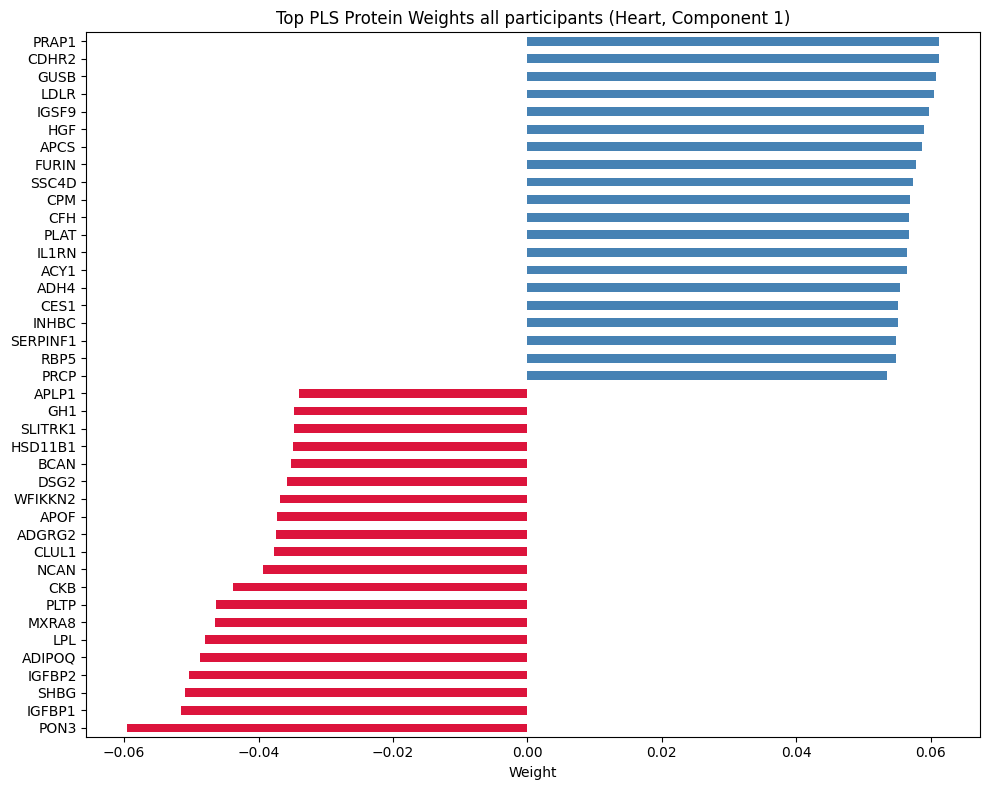

In [47]:
sorted_weights = protein_weights.sort_values()
top_n = 20
top_weights = pd.concat([sorted_weights.head(top_n), sorted_weights.tail(top_n)])
plt.figure(figsize=(10, 8))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Protein Weights all participants (Heart, Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

In [48]:
# Extract weights
pheno_weights = pd.Series(
    pls_model.y_weights_.flatten(),
    index=Y_Heart_all_clean.columns,
    name="PLS_Component_1_Weight"
)

# Sort by absolute weight (strongest influence on component)
top_pheno = pheno_weights.abs().sort_values(ascending=False).head(20)

# Display top 20 proteins (with their signed weights)
print(pheno_weights.loc[top_pheno.index])

Triglycerides                   0.027397
BMI                             0.024918
Weight                          0.023873
HDL                            -0.019719
C-reactive protein              0.015788
Glycated haemoglobin (HbA1c)    0.015419
Apolipoprotein A               -0.014241
Pulse rate(First)               0.013674
Systolic BP(First)              0.012827
Pulse rate(Second)              0.012707
Diastolic BP(First)             0.012264
Systolic BP(Second)             0.011969
Diastolic BP(Second)            0.011675
Apolipoprotein B                0.009928
Glucose                         0.009716
LDL                             0.005960
Cholesterol                     0.003112
Lipoprotein A                  -0.000045
Name: PLS_Component_1_Weight, dtype: float64


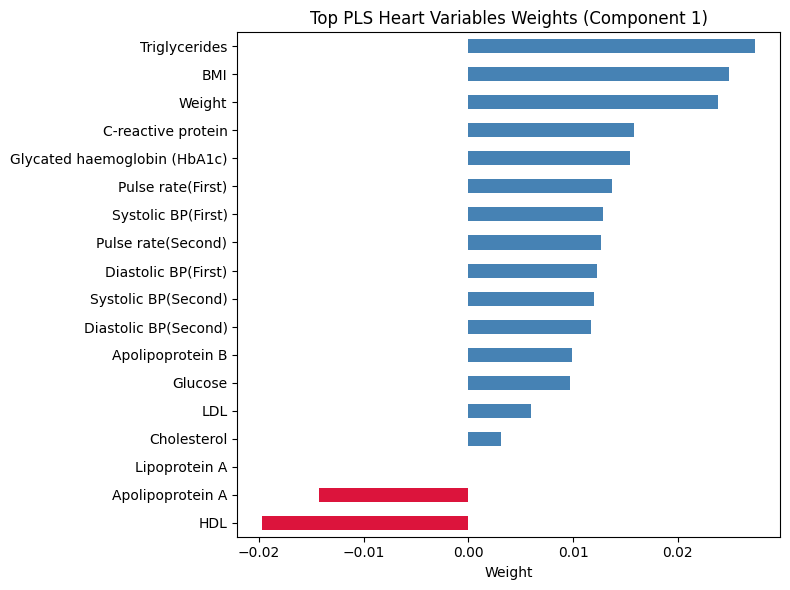

In [49]:
sorted_weights = pheno_weights.sort_values()
#top_n = 12
top_weights = sorted_weights
plt.figure(figsize=(8, 6))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Heart Variables Weights (Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

In [50]:
# 1. Standardize protein data
X_standardized = (X_Heart_all_clean - X_Heart_all_clean.mean()) / X_Heart_all_clean.std()

In [51]:
# 2. Run PCA and extract the first principal component
pca = PCA(n_components=1)
pc1 = pca.fit_transform(X_standardized)

In [52]:
# 3. Regress out PC1 from each protein
X_residualized = pd.DataFrame(index=X_standardized.index, columns=X_standardized.columns)
for col in X_standardized.columns:
    model = LinearRegression()
    model.fit(pc1, X_standardized[col])
    predicted = model.predict(pc1)
    residual = X_standardized[col] - predicted
    X_residualized[col] = residual

In [53]:
# 4. the residualized protein data
X_residualized = X_residualized.astype(float)

In [54]:
print("Original X shape:", X_Heart_all_clean.shape)
print("Residualized X shape:", X_residualized.shape)

Original X shape: (41160, 2923)
Residualized X shape: (41160, 2923)


In [55]:
# 1. Split the residualized data
X_train_resid, X_test_resid, Y_train_resid, Y_test_resid = train_test_split(
    X_residualized, Y_Heart_all_clean, test_size=0.2, random_state=42
)

In [56]:
# 2. Define and fit the PLS model
pls_model_resid = PLSRegression(n_components=1)
pls_model_resid.fit(X_train_resid, Y_train_resid)

PLSRegression(n_components=1)

In [57]:
# 3. Predict on the test set
Y_pred_resid = pls_model_resid.predict(X_test_resid)

In [58]:
# 4. Evaluate performance
r2_resid = r2_score(Y_test_resid, Y_pred_resid)
r2_resid

0.08176749986136055

In [59]:
# 5. Extract top X weights (proteins)
protein_weights_resid = pd.Series(
    pls_model_resid.x_weights_.flatten(),
    index=X_residualized.columns,
    name="PLS_Component_1_Weight"
)
top_proteins_resid = protein_weights_resid.abs().sort_values(ascending=False).head(10)
top_protein_weights = protein_weights_resid.loc[top_proteins_resid.index]
top_protein_weights

PON3     0.069943
CDHR2   -0.067092
PRAP1   -0.065937
SSC4D   -0.063448
GUSB    -0.062450
IGSF9   -0.062117
HGF     -0.060971
IL1RN   -0.059867
APCS    -0.059769
CPM     -0.059542
Name: PLS_Component_1_Weight, dtype: float64

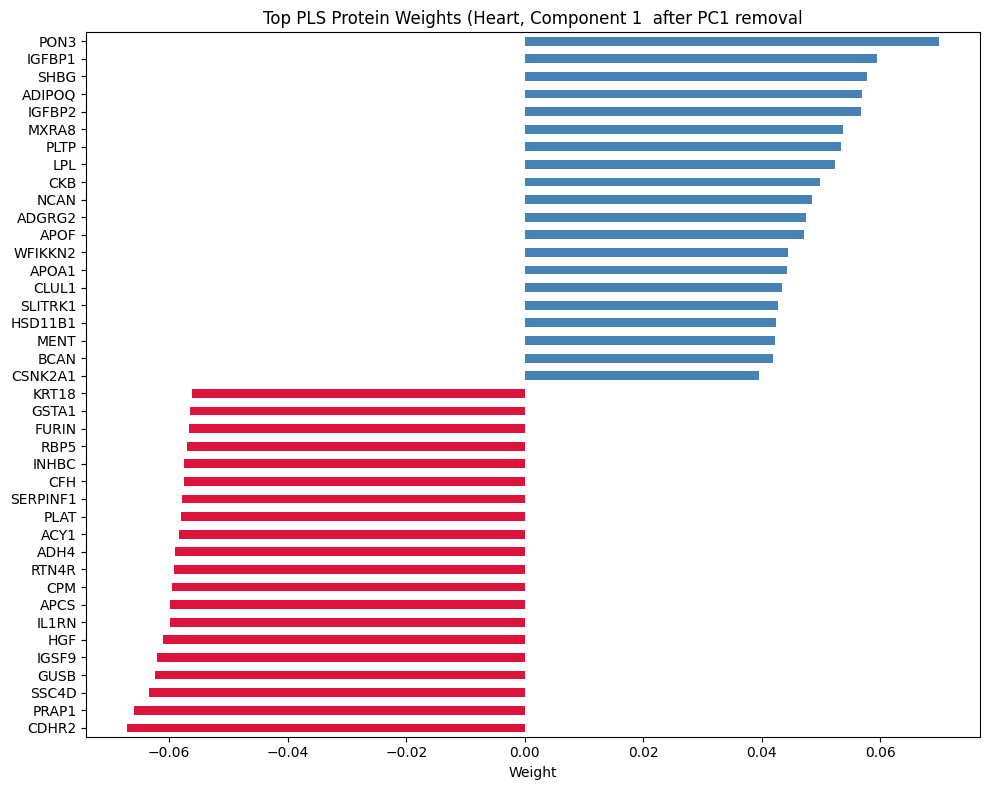

In [60]:
sorted_weights = protein_weights_resid.sort_values()
top_n = 20
top_weights = pd.concat([sorted_weights.head(top_n), sorted_weights.tail(top_n)])
plt.figure(figsize=(10, 8))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Protein Weights (Heart, Component 1  after PC1 removal")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

In [61]:
# 6. Extract top Y weights (phenotypes)
pheno_weights_resid = pd.Series(
    pls_model_resid.y_weights_.flatten(),
    index=Y_Heart_all_clean.columns,
    name="PLS_Component_1_Weight"
)
top_pheno_resid = pheno_weights_resid.abs().sort_values(ascending=False).head(20)
top_pheno_weights = pheno_weights_resid.loc[top_pheno_resid.index]

top_pheno_weights

Weight                         -0.044147
BMI                            -0.044044
Triglycerides                  -0.036851
HDL                             0.034839
Apolipoprotein A                0.026955
Glycated haemoglobin (HbA1c)   -0.026730
C-reactive protein             -0.023279
Systolic BP(First)             -0.019870
Systolic BP(Second)            -0.019640
Diastolic BP(First)            -0.018127
Diastolic BP(Second)           -0.017411
Pulse rate(First)              -0.016312
Glucose                        -0.016258
Pulse rate(Second)             -0.014454
Apolipoprotein B               -0.007777
Cholesterol                     0.004814
LDL                            -0.000818
Lipoprotein A                  -0.000368
Name: PLS_Component_1_Weight, dtype: float64

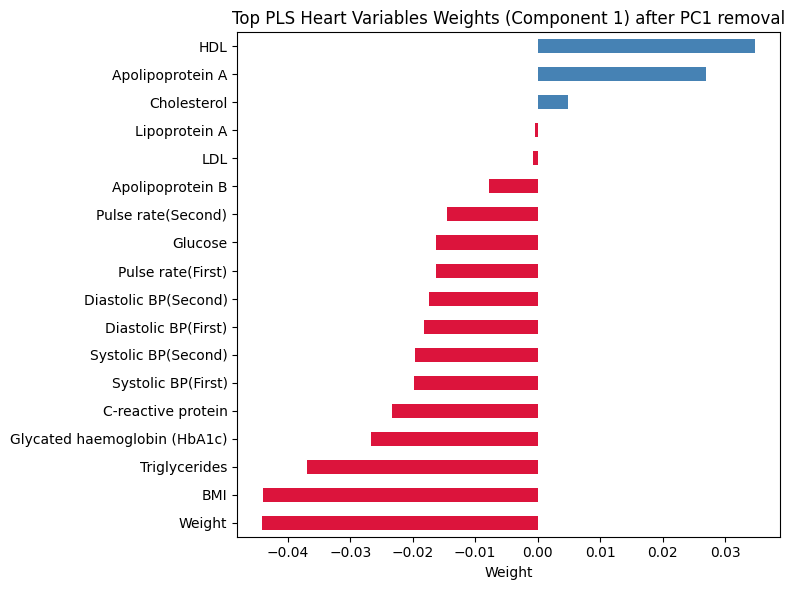

In [ ]:
sorted_weights = pheno_weights_resid.sort_values()
# top_n = 20
top_weights = sorted_weights
plt.figure(figsize=(8, 6))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Heart Variables Weights (Component 1) after PC1 removal")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

In [63]:
pls_scores = pls_model.transform(X_Heart_all_clean)

In [64]:
Heart_pheno = Heart_pheno.loc[X_Heart_all_clean.index].copy() 
Heart_pheno["PLS_Heart_Component1"] = pls_scores[:, 0]

In [65]:
icd10_codes_mapping = {
    'alzheimer': ['G300', 'G309', 'G301', 'G310'],
    'dementia': ['F000', 'F001', 'F002', 'F009', 'F010', 'F011', 'F012', 'F013', 'F018', 'F019', 'F020', 'F021', 'F022', 'F023', 'F024', 'F028'],
    'stroke': ['I689', 'I635', 'I633', 'I638', 'I634'],
    'lbd': ['G318'],  
    'ms': ['G35'],  
    'als': ['G122'],  
    'parkinson': ['G20'],
    'delirium': ['F051'],   # Overlaps with dementia in older adults 
    'neurocognitive_disorder' : ['F067'], 
    'ns_degeneration' : ['G319', 'G328']
    
    }

In [ ]:
main_icd10_columns = [col for col in Heart_final_df.columns if col.startswith("Diagnoses_main_ICD10")]
secondary_icd10_columns = [col for col in Heart_final_df.columns if col.startswith("Diagnoses_secondary_ICD10")]
icd10_columns = [col for col in Heart_final_df.columns if col.startswith("Diagnoses_ICD10")]

In [67]:
all_diagnosis_columns = main_icd10_columns + secondary_icd10_columns + icd10_columns

In [68]:
def check_diagnosis(row, disease_codes, diagnosis_columns):
    for col in diagnosis_columns:
        if col in row:
            for code in disease_codes:
                if code in str(row[col]): 
                    return 1  
    return 0

In [69]:
# Binary columns for each diseases 
for disease, codes in icd10_codes_mapping.items():
    column_name = disease.lower() 
    Heart_pheno[column_name] = Heart_pheno.apply(lambda row: check_diagnosis(row, codes, all_diagnosis_columns), axis=1)

In [76]:
disease_columns = ['alzheimer', 'dementia', 'stroke', 'lbd', 'ms', 'als', 'parkinson', 'delirium', 'neurocognitive_disorder', 'ns_degeneration']
for disease in disease_columns:
    total = Heart_pheno[disease].sum()
    print(f"participants diagnosed with {disease.capitalize()}: {total}")

participants diagnosed with Alzheimer: 546
participants diagnosed with Dementia: 753
participants diagnosed with Stroke: 393
participants diagnosed with Lbd: 113
participants diagnosed with Ms: 341
participants diagnosed with Als: 240
participants diagnosed with Parkinson: 747
participants diagnosed with Delirium: 180
participants diagnosed with Neurocognitive_disorder: 123
participants diagnosed with Ns_degeneration: 240


In [77]:
pls_columns = ["PLS_Heart_Component1"]

diagnosis_columns = ["alzheimer", "dementia", "stroke", "lbd", "ms", "als", "parkinson", "delirium", "neurocognitive_disorder", "ns_degeneration"]

In [81]:
t_test_results = {}

for pls in pls_columns:
    for diagnosis in diagnosis_columns:
        if pls not in Heart_pheno.columns or diagnosis not in Heart_pheno.columns:
            print(f"Skipping {pls} or {diagnosis} because it's missing from dataset.")
            continue
        
        diagnosed_group = Heart_pheno[Heart_pheno[diagnosis] == 1][pls].dropna()
        non_diagnosed_group = Heart_pheno[Heart_pheno[diagnosis] == 0][pls].dropna()
        
        
        t_stat, p_value = ttest_ind(diagnosed_group, non_diagnosed_group, nan_policy='omit')
        
        t_test_results[(pls, diagnosis)] = {"t_stat": t_stat, "p_value": p_value}
t_test_results_df = pd.DataFrame.from_dict(t_test_results, orient='index')

In [82]:
t_test_results_df

t_stat       p_value
PLS_Heart_Component1 alzheimer                2.557800  1.053721e-02
                     dementia                 3.796370  1.470407e-04
                     stroke                   7.104781  1.224664e-12
                     lbd                      1.542595  1.229368e-01
                     ms                      -1.609268  1.075653e-01
                     als                      2.584513  9.755083e-03
                     parkinson                2.416610  1.567012e-02
                     delirium                 1.754059  7.942783e-02
                     neurocognitive_disorder  3.927721  8.589455e-05
                     ns_degeneration          4.849993  1.239163e-06

C:\Users\Romina\AppData\Local\Temp\ipykernel_17668\2354718752.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Romina\AppData\Local\Temp\ipykernel_17668\2354718752.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Romina\AppData\Local\Temp\ipykernel_17668\2354718752.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Romina\AppData\Local\Temp\ipykernel_17668\2354718752.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable t

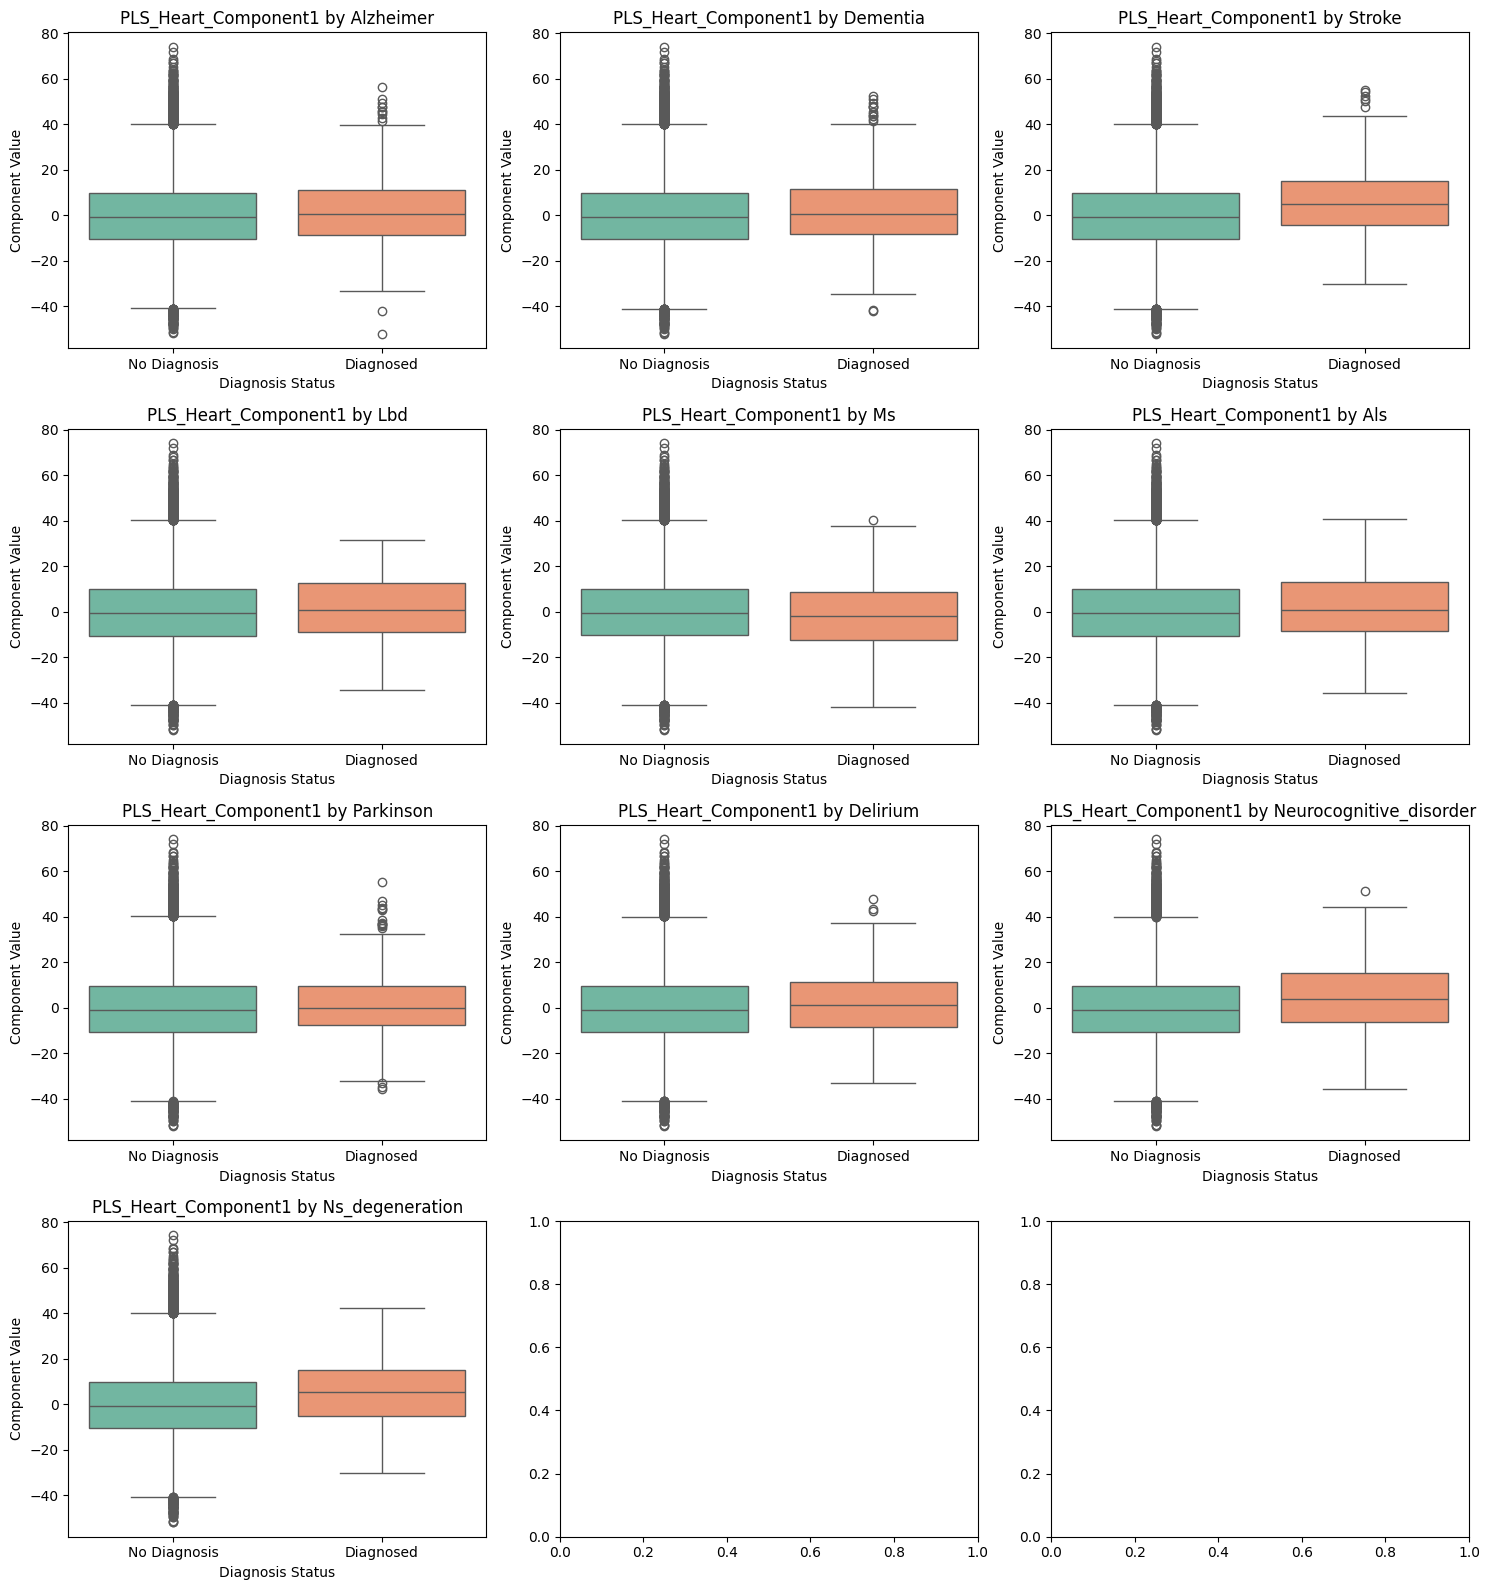

In [84]:
diseases = ["alzheimer", "dementia", "stroke", "lbd", "ms", "als", 
            "parkinson", "delirium", "neurocognitive_disorder", "ns_degeneration"]

component_col = "PLS_Heart_Component1"

n_cols = 3
n_rows = (len(diseases) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, disease in enumerate(diseases):
    ax = axes[i]
    
    plot_df = Heart_pheno[[component_col, disease]].dropna().copy()
    plot_df[disease] = plot_df[disease].map({0: "No Diagnosis", 1: "Diagnosed"})
    
    sns.boxplot(
        x=disease, 
        y=component_col, 
        data=plot_df, 
        palette="Set2", 
        ax=ax,
        order=["No Diagnosis", "Diagnosed"]  # Forces consistent order
    )
    
    ax.set_title(f"{component_col} by {disease.capitalize()}")
    ax.set_xlabel("Diagnosis Status")
    ax.set_ylabel("Component Value")
plt.tight_layout()
plt.show()

In [86]:
Heart_pheno = Heart_final_df[ (Heart_final_df["Heart features"] == 1) & (Heart_final_df["imaging"] == 1)].copy()
print("Number of participants with Heart variables and imaging:", Heart_pheno.shape[0])

Number of participants with Heart variables and imaging: 4674


In [87]:
# Protein columns
protein_cols = Heart_pheno.loc[:, "A1BG": "ZPR1"].columns
X_Heart = Heart_pheno[protein_cols]

In [88]:
start_col = "Pulse rate(First)"
end_col = "Triglycerides"
Heart_outcome_cols = Heart_pheno.loc[:, start_col:end_col].columns

In [89]:
Y_Heart = Heart_pheno[Heart_outcome_cols]

In [90]:
print("X shape:", X_Heart.shape)
print("Y shape:", Y_Heart.shape)

X shape: (4674, 2923)
Y shape: (4674, 18)


In [91]:
X_Heart_clean = X_Heart.dropna()
Y_Heart_clean = Y_Heart.loc[X_Heart_clean.index].dropna()

X_Heart_clean = X_Heart_clean.loc[Y_Heart_clean.index]
print("Clean X shape:", X_Heart_clean.shape)
print("Clean Y shape:", Y_Heart_clean.shape)

Clean X shape: (4674, 2923)
Clean Y shape: (4674, 18)


In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_Heart_clean, Y_Heart_clean, test_size=0.2, random_state=42
)

pls_model = PLSRegression(n_components=1)

pls_model.fit(X_train, Y_train)

Y_pred = pls_model.predict(X_test)

r2 = r2_score(Y_test, Y_pred)
print("PLS Regression Test R² Score:", r2)

PLS Regression Test R² Score: 0.06901619849436973


In [93]:
# Extract weights
protein_weights = pd.Series(
    pls_model.x_weights_.flatten(),
    index=X_Heart_clean.columns,
    name="PLS_Component_1_Weight"
)

# Sort by absolute weight (strongest influence on component)
top_proteins = protein_weights.abs().sort_values(ascending=False).head(10)

print(protein_weights.loc[top_proteins.index])

LDLR      0.074243
CDHR2     0.067567
PLAT      0.065768
SSC4D     0.064660
GUSB      0.064063
CPM       0.061935
ACY1      0.060742
APCS      0.060675
IGFBP2   -0.059595
RBP5      0.058381
Name: PLS_Component_1_Weight, dtype: float64


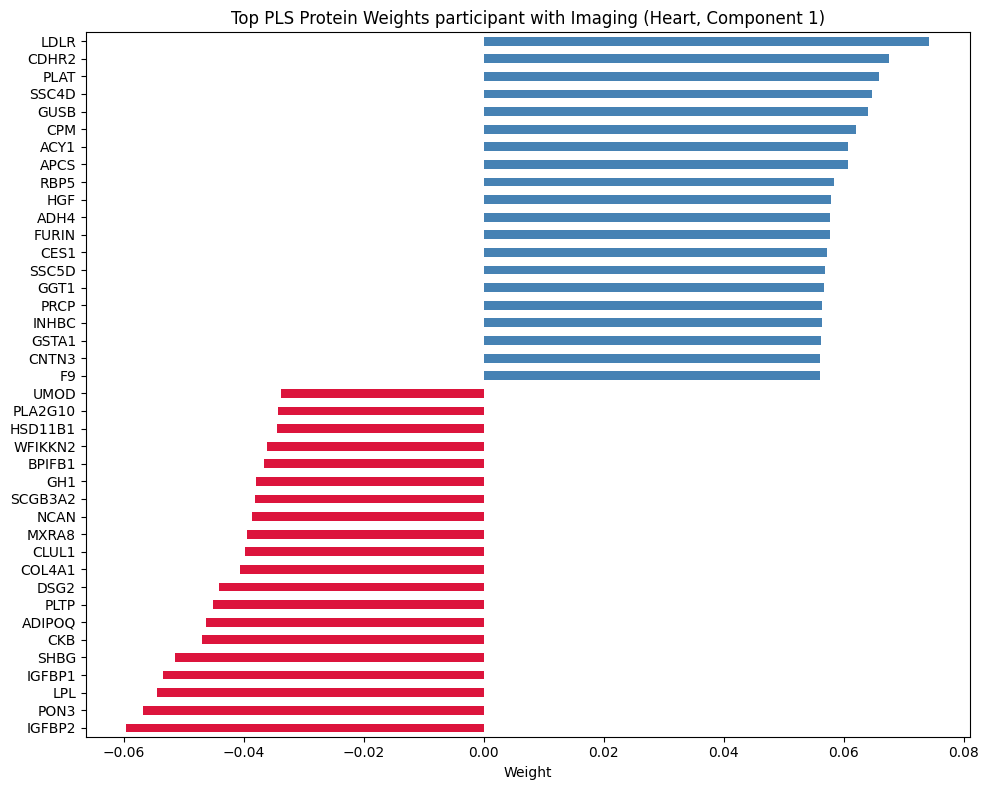

In [94]:
sorted_weights = protein_weights.sort_values()
top_n = 20
top_weights = pd.concat([sorted_weights.head(top_n), sorted_weights.tail(top_n)])
plt.figure(figsize=(10, 8))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Protein Weights participant with Imaging (Heart, Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

In [95]:
# Extract weights
pheno_weights = pd.Series(
    pls_model.y_weights_.flatten(),
    index=Y_Heart_clean.columns,
    name="PLS_Component_1_Weight"
)

# Sort by absolute weight (strongest influence on component)
top_pheno = pheno_weights.abs().sort_values(ascending=False).head(12)

# Display top 20 proteins (with their signed weights)
print(pheno_weights.loc[top_pheno.index])

Triglycerides           0.030906
Weight                  0.027385
BMI                     0.027032
HDL                    -0.019066
Apolipoprotein B        0.018119
Diastolic BP(First)     0.017695
Diastolic BP(Second)    0.017041
Systolic BP(First)      0.016666
Systolic BP(Second)     0.015703
LDL                     0.015457
Apolipoprotein A       -0.013612
C-reactive protein      0.013009
Name: PLS_Component_1_Weight, dtype: float64


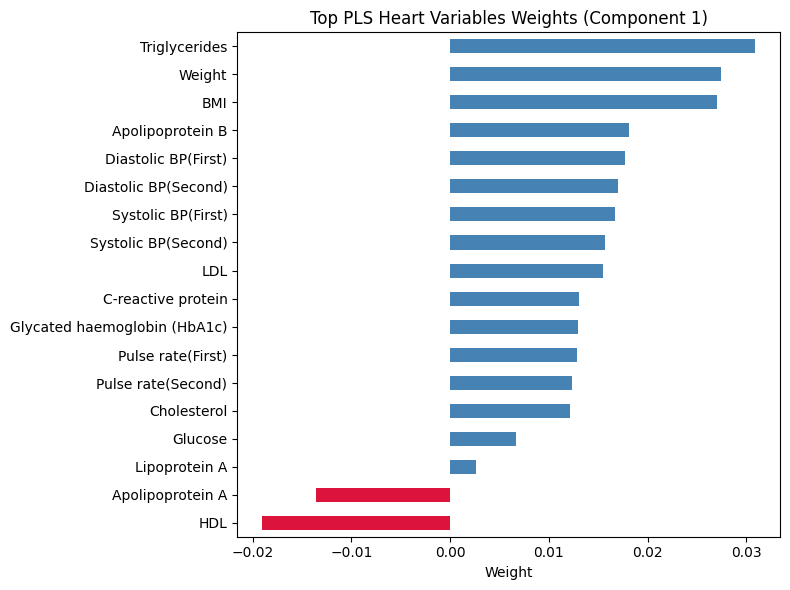

In [96]:
sorted_weights = pheno_weights.sort_values()
#top_n = 12
top_weights = sorted_weights
plt.figure(figsize=(8, 6))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Heart Variables Weights (Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

In [97]:
# 1. Standardize protein data
X_standardized = (X_Heart_clean - X_Heart_clean.mean()) / X_Heart_clean.std()

In [98]:
# 2. Run PCA and extract the first principal component
pca = PCA(n_components=1)
pc1 = pca.fit_transform(X_standardized)

In [99]:
# 3. Regress out PC1 from each protein
X_residualized = pd.DataFrame(index=X_standardized.index, columns=X_standardized.columns)
for col in X_standardized.columns:
    model = LinearRegression()
    model.fit(pc1, X_standardized[col])
    predicted = model.predict(pc1)
    residual = X_standardized[col] - predicted
    X_residualized[col] = residual

In [100]:
# 4. the residualized protein data
X_residualized = X_residualized.astype(float)

In [101]:
print("Original X shape:", X_Heart_clean.shape)
print("Residualized X shape:", X_residualized.shape)

Original X shape: (4674, 2923)
Residualized X shape: (4674, 2923)


In [102]:
# 1. Split the residualized data
X_train_resid, X_test_resid, Y_train_resid, Y_test_resid = train_test_split(
    X_residualized, Y_Heart_clean, test_size=0.2, random_state=42
)

In [103]:
# 2. Define and fit the PLS model
pls_model_resid = PLSRegression(n_components=1)
pls_model_resid.fit(X_train_resid, Y_train_resid)

PLSRegression(n_components=1)

In [104]:
# 3. Predict on the test set
Y_pred_resid = pls_model_resid.predict(X_test_resid)

In [105]:
# 4. Evaluate performance
r2_resid = r2_score(Y_test_resid, Y_pred_resid)
r2_resid

0.08530571222099338

In [106]:
# 5. Extract top X weights (proteins)
protein_weights_resid = pd.Series(
    pls_model_resid.x_weights_.flatten(),
    index=X_residualized.columns,
    name="PLS_Component_1_Weight"
)
top_proteins_resid = protein_weights_resid.abs().sort_values(ascending=False).head(10)
top_protein_weights = protein_weights_resid.loc[top_proteins_resid.index]
top_protein_weights

CDHR2     0.075183
LDLR      0.074991
SSC4D     0.072562
PLAT      0.069002
IGFBP2   -0.068651
GUSB      0.067857
PON3     -0.067057
CPM       0.066022
APCS      0.064157
ACY1      0.064037
Name: PLS_Component_1_Weight, dtype: float64

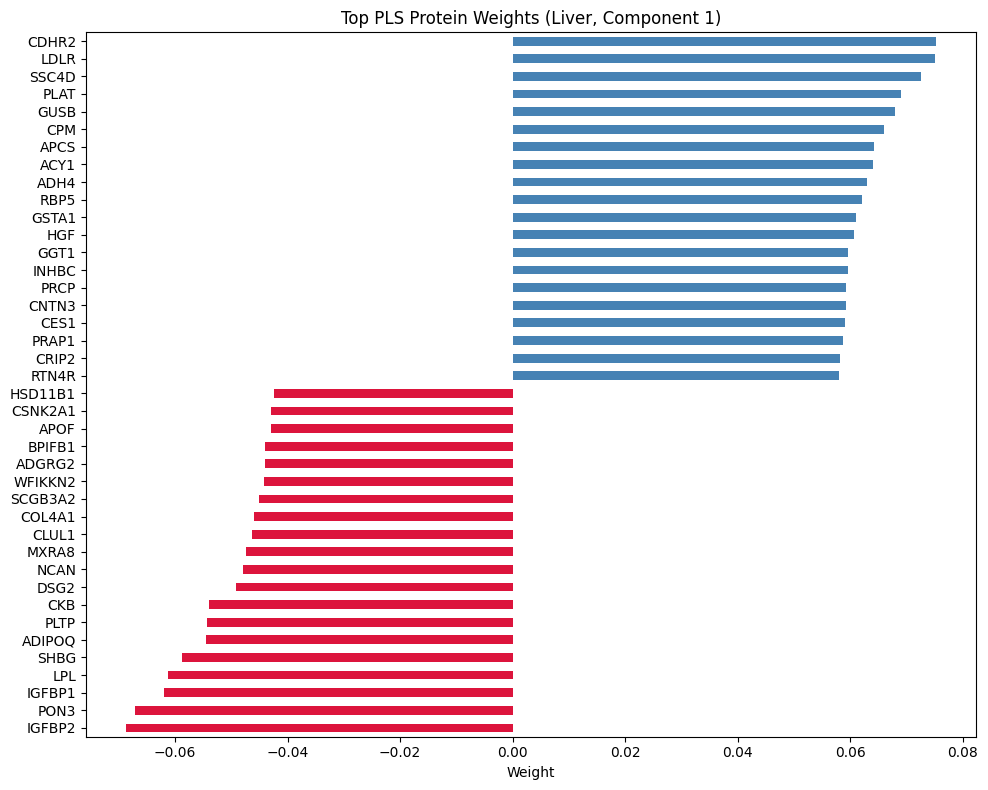

In [ ]:
sorted_weights = protein_weights_resid.sort_values()
top_n = 20
top_weights = pd.concat([sorted_weights.head(top_n), sorted_weights.tail(top_n)])
plt.figure(figsize=(10, 8))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Protein Weights (Heart, Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

In [108]:
# 6. Extract top Y weights (phenotypes)
pheno_weights_resid = pd.Series(
    pls_model_resid.y_weights_.flatten(),
    index=Y_Heart_clean.columns,
    name="PLS_Component_1_Weight"
)
top_pheno_resid = pheno_weights_resid.abs().sort_values(ascending=False).head(20)
top_pheno_weights = pheno_weights_resid.loc[top_pheno_resid.index]

top_pheno_weights

Weight                          0.056329
BMI                             0.053077
Triglycerides                   0.048325
HDL                            -0.041873
Apolipoprotein A               -0.031599
Diastolic BP(First)             0.031118
Diastolic BP(Second)            0.029789
Systolic BP(First)              0.027671
Systolic BP(Second)             0.027447
Glycated haemoglobin (HbA1c)    0.024441
Apolipoprotein B                0.024313
C-reactive protein              0.021932
Pulse rate(First)               0.017760
LDL                             0.017572
Pulse rate(Second)              0.016381
Glucose                         0.013199
Cholesterol                     0.009277
Lipoprotein A                   0.004128
Name: PLS_Component_1_Weight, dtype: float64

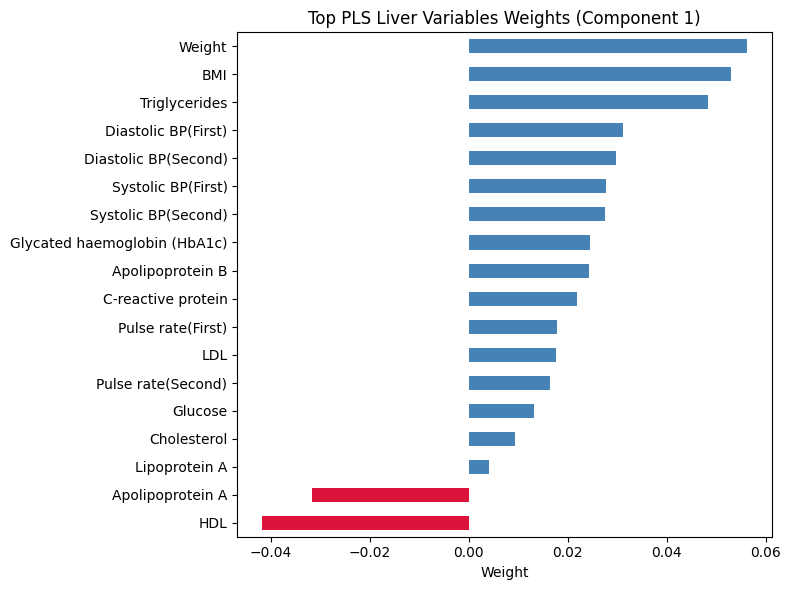

In [ ]:
sorted_weights = pheno_weights_resid.sort_values()
# top_n = 20
top_weights = sorted_weights
plt.figure(figsize=(8, 6))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Heart Variables Weights (Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

In [110]:
pls_scores = pls_model.transform(X_Heart_clean)

In [116]:
Heart_pheno = Heart_pheno.loc[X_Heart_clean.index].copy() 
Heart_pheno["PLS_Heart_Component1"] = pls_scores[:, 0]

In [ ]:
Heart_region_cols = [col for col in Heart_pheno.columns if "Mean_Thickness_" in col]

# Covariates to adjust for
covariates = ["Age_at_recruitment", "Sex"]

# Define which PLS component to analyze
pls_component_col = "PLS_Heart_Component1"

# Initialize dictionaries to store results
t_values_Heart_pls = {}
p_values_Heart_pls = {}

# Perform OLS for each brain region
for Heart_region in Heart_region_cols:
    if Heart_region not in Heart_pheno.columns:
        continue

    X = Heart_pheno[[pls_component_col] + covariates].copy()
    y = Heart_pheno[Heart_region].copy()

    X = sm.add_constant(X)  # Add intercept
    model = sm.OLS(y, X, missing="drop").fit()

    t_values_Heart_pls[Heart_region] = model.tvalues[pls_component_col]
    p_values_Heart_pls[Heart_region] = model.pvalues[pls_component_col]

# Convert results to DataFrames
t_values_Heart_pls_df = pd.DataFrame(t_values_Heart_pls, index=[pls_component_col])
p_values_Heart_pls_df = pd.DataFrame(p_values_Heart_pls, index=[pls_component_col])

# Combine for export
t_values_Heart_pls_df.columns = [f"T-Value_{col}" for col in t_values_Heart_pls_df.columns]
p_values_Heart_pls_df.columns = [f"P-Value_{col}" for col in p_values_Heart_pls_df.columns]

Heart_combined_results_pls = pd.concat([t_values_Heart_pls_df, p_values_Heart_pls_df], axis=1)

Heart_combined_results_pls.to_csv("PLS_Component1_vs_Heart_Thickness.csv")
Heart_combined_results_pls

,T-Value_Mean_Thickness_CaudalAnteriorCingulate_Left_Hemisphere,T-Value_Mean_Thickness_CaudalMiddleFrontal_Left_Hemisphere,T-Value_Mean_Thickness_Cuneus_Left_Hemisphere,T-Value_Mean_Thickness_Entorhinal_Left_Hemisphere,T-Value_Mean_Thickness_Fusiform_Left_Hemisphere,T-Value_Mean_Thickness_InferiorParietal_Left_Hemisphere,T-Value_Mean_Thickness_InferiorTemporal_Left_Hemisphere,T-Value_Mean_Thickness_IsthmusCingulate_Left_Hemisphere,T-Value_Mean_Thickness_LateralOccipital_Left_Hemisphere,T-Value_Mean_Thickness_LateralOrbitoFrontal_Left_Hemisphere,...,P-Value_Mean_Thickness_Precentral_Right_Hemisphere,P-Value_Mean_Thickness_Precuneus_Right_Hemisphere,P-Value_Mean_Thickness_RostralAnteriorCingulate_Right_Hemisphere,P-Value_Mean_Thickness_RostralMiddleFrontal_Right_Hemisphere,P-Value_Mean_Thickness_SuperiorFrontal_Right_Hemisphere,P-Value_Mean_Thickness_SuperiorParietal_Right_Hemisphere,P-Value_Mean_Thickness_SuperiorTemporal_Right_Hemisphere,P-Value_Mean_Thickness_Supramarginal_Right_Hemisphere,P-Value_Mean_Thickness_TransverseTemporal_Right_Hemisphere,P-Value_Mean_Thickness_Insula_Right_Hemisphere
PLS_Heart_Component1,-2.131462,-0.990325,2.297169,-3.734969,-1.25564,0.060409,-2.379924,0.116543,1.970207,-2.035043,...,0.080102,0.353229,0.453356,0.324206,0.91965,0.122465,0.000895,0.465385,0.706577,0.026946


In [118]:
# Mapping from your column names to ggseg Desikan-Killiany atlas names
cortical_mapping = {
    "T-Value_Mean_Thickness_CaudalAnteriorCingulate_Left_Hemisphere": "caudalanteriorcingulate_left",
    "T-Value_Mean_Thickness_CaudalMiddleFrontal_Left_Hemisphere": "caudalmiddlefrontal_left",
    "T-Value_Mean_Thickness_Cuneus_Left_Hemisphere": "cuneus_left",
    "T-Value_Mean_Thickness_Entorhinal_Left_Hemisphere": "entorhinal_left",
    "T-Value_Mean_Thickness_Fusiform_Left_Hemisphere": "fusiform_left",
    "T-Value_Mean_Thickness_InferiorParietal_Left_Hemisphere": "inferiorparietal_left",
    "T-Value_Mean_Thickness_InferiorTemporal_Left_Hemisphere": "inferiortemporal_left",
    "T-Value_Mean_Thickness_IsthmusCingulate_Left_Hemisphere": "isthmuscingulate_left",
    "T-Value_Mean_Thickness_LateralOccipital_Left_Hemisphere": "lateraloccipital_left",
    "T-Value_Mean_Thickness_LateralOrbitoFrontal_Left_Hemisphere": "lateralorbitofrontal_left",
    "T-Value_Mean_Thickness_Lingual_Left_Hemisphere": "lingual_left",
    "T-Value_Mean_Thickness_MedialOrbitoFrontal_Left_Hemisphere": "medialorbitofrontal_left",
    "T-Value_Mean_Thickness_MiddleTemporal_Left_Hemisphere": "middletemporal_left",
    "T-Value_Mean_Thickness_Parahippocampal_Left_Hemisphere": "parahippocampal_left",
    "T-Value_Mean_Thickness_Paracentral_Left_Hemisphere": "paracentral_left",
    "T-Value_Mean_Thickness_ParsOpercularis_Left_Hemisphere": "parsopercularis_left",
    "T-Value_Mean_Thickness_ParsOrbitalis_Left_Hemisphere": "parsorbitalis_left",
    "T-Value_Mean_Thickness_ParsTriangularis_Left_Hemisphere": "parstriangularis_left",
    "T-Value_Mean_Thickness_Pericalcarine_Left_Hemisphere": "pericalcarine_left",
    "T-Value_Mean_Thickness_Postcentral_Left_Hemisphere": "postcentral_left",
    "T-Value_Mean_Thickness_PosteriorCingulate_Left_Hemisphere": "posteriorcingulate_left",
    "T-Value_Mean_Thickness_Precentral_Left_Hemisphere": "precentral_left",
    "T-Value_Mean_Thickness_Precuneus_Left_Hemisphere": "precuneus_left",
    "T-Value_Mean_Thickness_RostralAnteriorCingulate_Left_Hemisphere": "rostralanteriorcingulate_left",
    "T-Value_Mean_Thickness_RostralMiddleFrontal_Left_Hemisphere": "rostralmiddlefrontal_left",
    "T-Value_Mean_Thickness_SuperiorFrontal_Left_Hemisphere": "superiorfrontal_left",
    "T-Value_Mean_Thickness_SuperiorParietal_Left_Hemisphere": "superiorparietal_left",
    "T-Value_Mean_Thickness_SuperiorTemporal_Left_Hemisphere": "superiortemporal_left",
    "T-Value_Mean_Thickness_Supramarginal_Left_Hemisphere": "supramarginal_left",
    "T-Value_Mean_Thickness_TransverseTemporal_Left_Hemisphere": "transversetemporal_left",
    "T-Value_Mean_Thickness_Insula_Left_Hemisphere": "insula_left",
    
    "T-Value_Mean_Thickness_CaudalAnteriorCingulate_Right_Hemisphere": "caudalanteriorcingulate_right",
    "T-Value_Mean_Thickness_CaudalMiddleFrontal_Right_Hemisphere": "caudalmiddlefrontal_right",
    "T-Value_Mean_Thickness_Cuneus_Right_Hemisphere": "cuneus_right",
    "T-Value_Mean_Thickness_Entorhinal_Right_Hemisphere": "entorhinal_right",
    "T-Value_Mean_Thickness_Fusiform_Right_Hemisphere": "fusiform_right",
    "T-Value_Mean_Thickness_InferiorParietal_Right_Hemisphere": "inferiorparietal_right",
    "T-Value_Mean_Thickness_InferiorTemporal_Right_Hemisphere": "inferiortemporal_right",
    "T-Value_Mean_Thickness_IsthmusCingulate_Right_Hemisphere": "isthmuscingulate_right",
    "T-Value_Mean_Thickness_LateralOccipital_Right_Hemisphere": "lateraloccipital_right",
    "T-Value_Mean_Thickness_LateralOrbitoFrontal_Right_Hemisphere": "lateralorbitofrontal_right",
    "T-Value_Mean_Thickness_Lingual_Right_Hemisphere": "lingual_right",
    "T-Value_Mean_Thickness_MedialOrbitoFrontal_Right_Hemisphere": "medialorbitofrontal_right",
    "T-Value_Mean_Thickness_MiddleTemporal_Right_Hemisphere": "middletemporal_right",
    "T-Value_Mean_Thickness_Parahippocampal_Right_Hemisphere": "parahippocampal_right",
    "T-Value_Mean_Thickness_Paracentral_Right_Hemisphere": "paracentral_right",
    "T-Value_Mean_Thickness_ParsOpercularis_Right_Hemisphere": "parsopercularis_right",
    "T-Value_Mean_Thickness_ParsOrbitalis_Right_Hemisphere": "parsorbitalis_right",
    "T-Value_Mean_Thickness_ParsTriangularis_Right_Hemisphere": "parstriangularis_right",
    "T-Value_Mean_Thickness_Pericalcarine_Right_Hemisphere": "pericalcarine_right",
    "T-Value_Mean_Thickness_Postcentral_Right_Hemisphere": "postcentral_right",
    "T-Value_Mean_Thickness_PosteriorCingulate_Right_Hemisphere": "posteriorcingulate_right",
    "T-Value_Mean_Thickness_Precentral_Right_Hemisphere": "precentral_right",
    "T-Value_Mean_Thickness_Precuneus_Right_Hemisphere": "precuneus_right",
    "T-Value_Mean_Thickness_RostralAnteriorCingulate_Right_Hemisphere": "rostralanteriorcingulate_right",
    "T-Value_Mean_Thickness_RostralMiddleFrontal_Right_Hemisphere": "rostralmiddlefrontal_right",
    "T-Value_Mean_Thickness_SuperiorFrontal_Right_Hemisphere": "superiorfrontal_right",
    "T-Value_Mean_Thickness_SuperiorParietal_Right_Hemisphere": "superiorparietal_right",
    "T-Value_Mean_Thickness_SuperiorTemporal_Right_Hemisphere": "superiortemporal_right",
    "T-Value_Mean_Thickness_Supramarginal_Right_Hemisphere": "supramarginal_right",
    "T-Value_Mean_Thickness_TransverseTemporal_Right_Hemisphere": "transversetemporal_right",
    "T-Value_Mean_Thickness_Insula_Right_Hemisphere": "insula_right",
}


Processing PLS_Heart_Component1: Extracted 62 valid T-values


<Figure size 800x800 with 0 Axes>

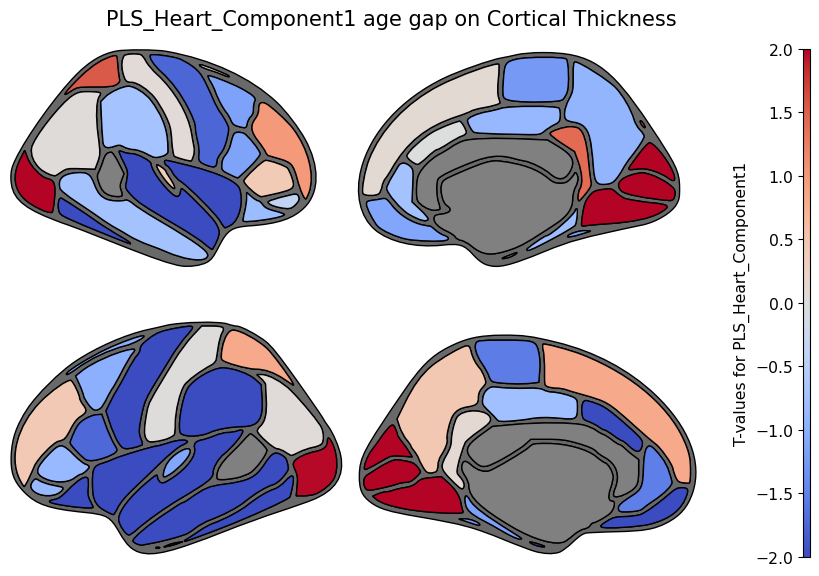

In [ ]:
Heart_region_columns = [col for col in t_values_Heart_pls_df.columns if "Mean_Thickness_" in col]
for organ in t_values_Heart_pls_df.index:
    
 
    t_values_Heart_dict = {
        cortical_mapping[col]: t_values_Heart_pls_df.loc[organ, col]
        for col in Heart_region_columns if col in cortical_mapping  
    }

   
    t_values_Heart_dict = {k: v for k, v in t_values_Heart_dict.items() if not pd.isna(v)}

    if not t_values_Heart_dict:
        continue

    
    print(f"Processing {organ}: Extracted {len(t_values_Heart_dict)} valid T-values")

    import ggseg
    plt.figure(figsize=(8, 8))
    ggseg.plot_dk(
        t_values_Heart_dict, cmap="coolwarm", figsize=(8, 8), background="white", 
        edgecolor="black", bordercolor="dimgray", ylabel=f"T-values for {organ}", 
        title=f"{organ} age gap on Cortical Thickness", vminmax=[-2, 2]
    )
    plt.show()

<Figure size 800x800 with 0 Axes>

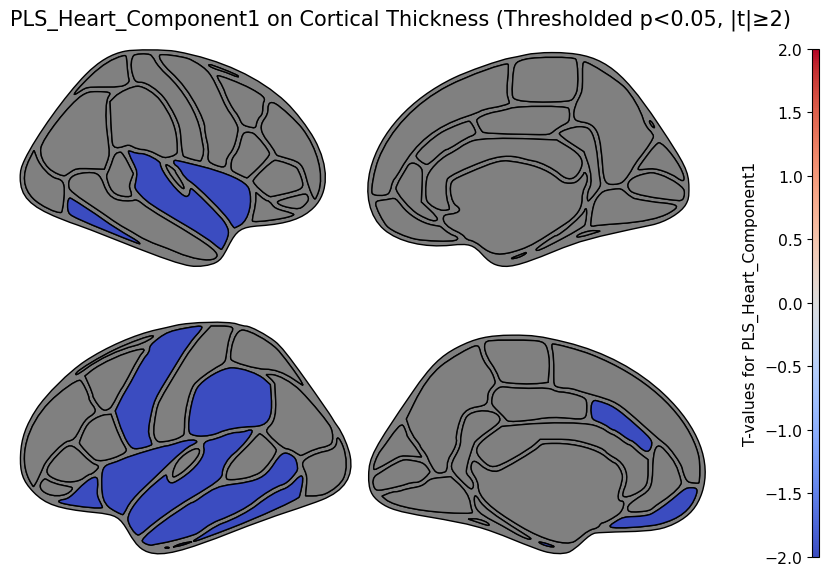

In [ ]:
t_values_thresholded_Heart_pls = t_values_Heart_pls_df.copy()

for organ in t_values_Heart_pls_df.index:
    for region in t_values_Heart_pls_df.columns:
        p_value = t_values_Heart_pls_df.loc[organ, region]  
        t_value = t_values_Heart_pls_df.loc[organ, region] 

        
        if p_value >= 0.05 or abs(t_value) < 2:  
            t_values_thresholded_Heart_pls.loc[organ, region] = 0 


for organ in t_values_thresholded_Heart_pls.index:
    t_values_Heart_dict = {
        cortical_mapping[col]: t_values_thresholded_Heart_pls.loc[organ, col]
        for col in t_values_thresholded_Heart_pls.columns if col in cortical_mapping
    }
    
   
    t_values_Heart_dict = {k: v for k, v in t_values_Heart_dict.items() if v != 0}

    
    if t_values_Heart_dict:
        plt.figure(figsize=(8, 8))
        ggseg.plot_dk(
            t_values_Heart_dict, cmap="coolwarm", figsize=(8, 8), background="white", 
            edgecolor="black", bordercolor="gray", ylabel=f"T-values for {organ}", 
            title=f"{organ} on Cortical Thickness (Thresholded p<0.05, |t|≥2)",
            vminmax=[-2, 2]
        )
        plt.show()